<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_ml/ml14_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 비지도 학습(Unsupervised Learning)

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans

# 데이터셋

In [4]:
!wget https://bit.ly/fruits_300_data -O fruits.npy

--2026-02-04 00:52:23--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2026-02-04 00:52:24--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2026-02-04 00:52:24--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

*   Jupyter 노트북에서는 Linux 명령어를 사용할 수 있음.
    *   !Linux_command
*   `wget URL -O file_name`: URL 주소의 파일을 다운로드해서 file_name 이름의 파일로 저장.
*   확장자 npy 파일: numpy 배열을 저장하는 바이너리 파일.
    *   `np.load()` 함수로 파일에서 배열을 추출할 수 있음.

In [5]:
fruits = np.load('fruits.npy')

In [6]:
fruits.shape  #> (300, 100, 100) => (n_samples, height, width)
# 100x100 크기의 흑백 이미지 300개를 numpy 배열로 저장한 데이터셋.

(300, 100, 100)

## 데이터 시각화

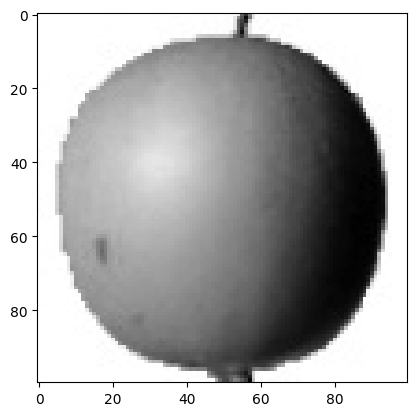

In [8]:
plt.imshow(fruits[0], cmap=plt.cm.binary)
plt.show()

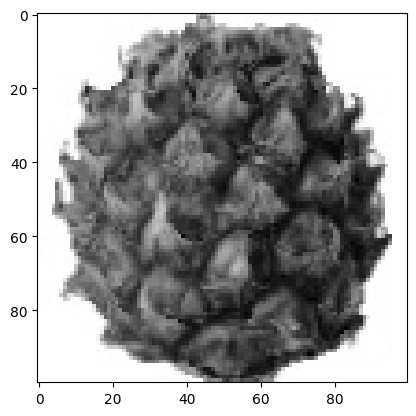

In [9]:
plt.imshow(fruits[100], cmap=plt.cm.binary)
plt.show()

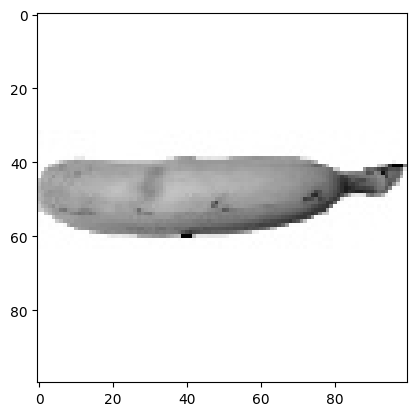

In [10]:
plt.imshow(fruits[200], cmap=plt.cm.binary)
plt.show()

배열의 이미지를 100개씩 시각화

In [18]:
def plot_img_array(arr, ncols=10):
    n = len(arr)  # 배열의 아이템 개수.
    nrows = int(np.ceil(n / ncols))  # Axes(subplot)의 행의 개수

    # figsize=(figure_width, figure_height)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols, nrows))

    for i in range(nrows):
        for j in range(ncols):
            idx = i * ncols + j  # arr에서 사용할 인덱스
            if idx < n:  # idx는 배열의 아이템 개수보다 크면 안되기 때문에
                img = arr[idx]
                axes[i, j].imshow(img, cmap=plt.cm.binary)
            axes[i, j].axis('off')

    plt.show()

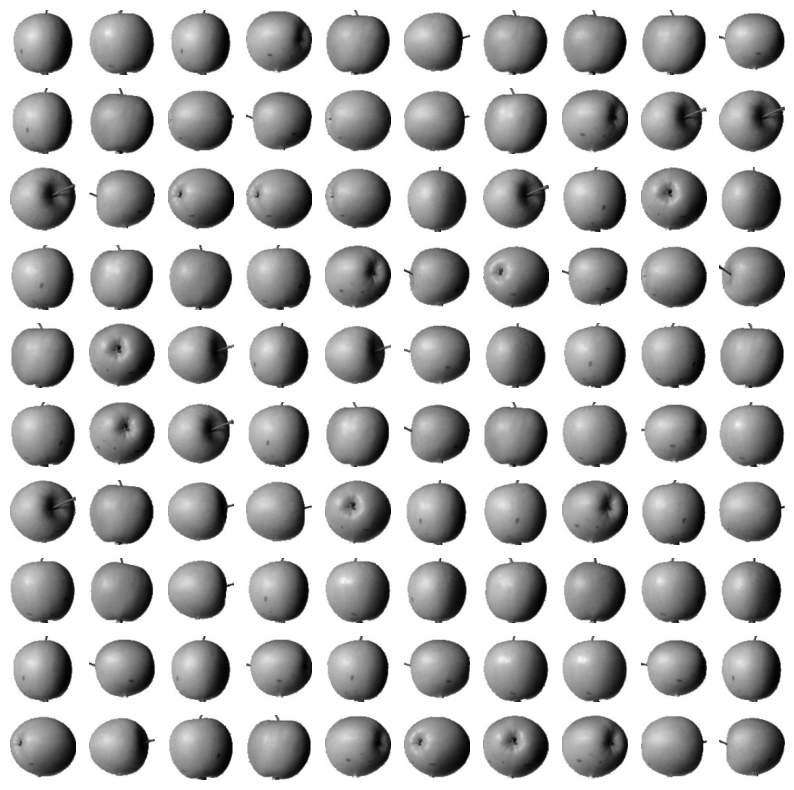

In [20]:
plot_img_array(fruits[:100])

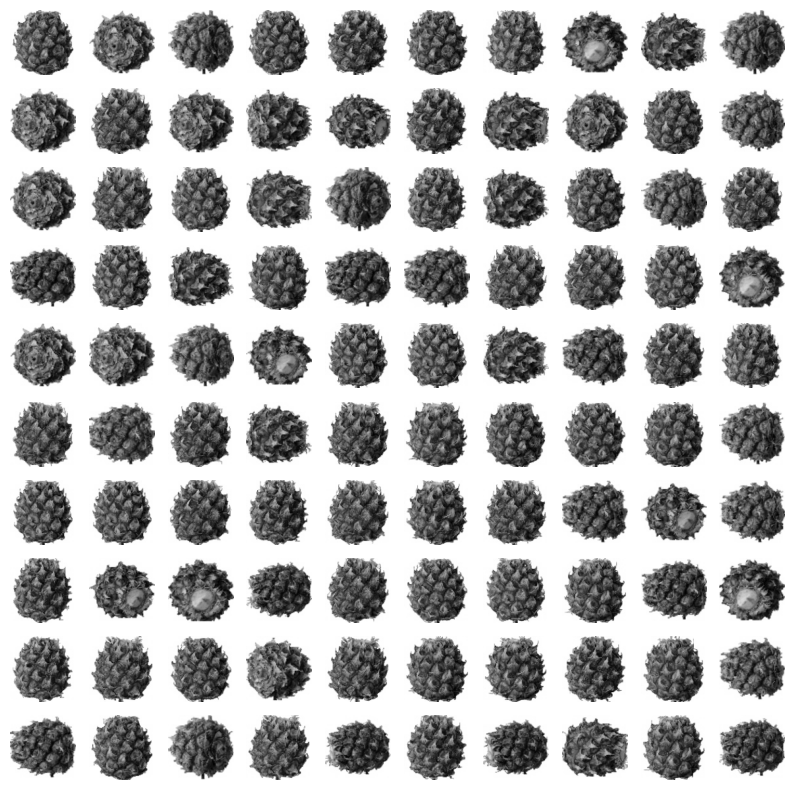

In [21]:
plot_img_array(fruits[100:200])

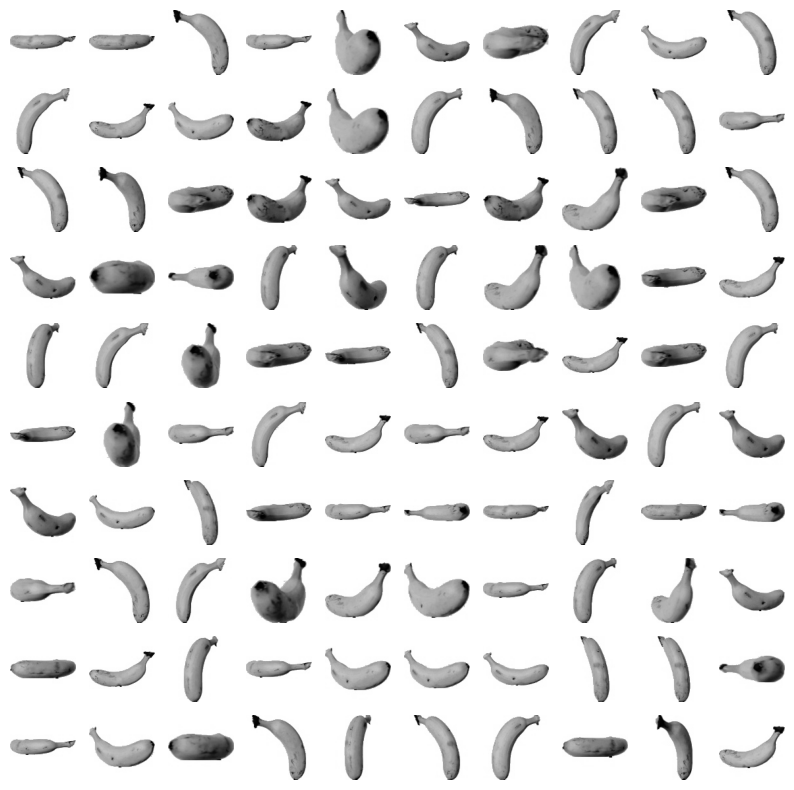

In [22]:
plot_img_array(fruits[200:])